### 05 - Inference yoga pose detection

In [272]:
import pandas as pd
import numpy as np
from ultralytics import YOLO
import pickle
from scipy import stats
import matplotlib.pyplot as plt
from PIL import Image

#### Stap 1. Video inladen

In [273]:
file = 'C:\\Users\\joost.vanstreels\\PycharmProjects\\YOLOv8\\runs\\DATASET\\Inference\\downdog5.gif'
file

'C:\\Users\\joost.vanstreels\\PycharmProjects\\YOLOv8\\runs\\DATASET\\Inference\\downdog5.gif'

#### Stap 2. Keypoints genereren met YOLO

In [274]:
# Keuze uit verschillende modellen
model = YOLO('yolov8m-pose.pt')
#model = YOLO('yolov8n-pose.pt')

In [275]:
results_inference = model.predict(file, save=True, imgsz=320, vid_stride=3, conf=0.5)

video 1/1 (50/374) C:\Users\joost.vanstreels\PycharmProjects\YOLOv8\runs\DATASET\Inference\downdog5.gif: 640x640 1 person, 1987.4ms
video 1/1 (51/374) C:\Users\joost.vanstreels\PycharmProjects\YOLOv8\runs\DATASET\Inference\downdog5.gif: 640x640 1 person, 1784.8ms
video 1/1 (52/374) C:\Users\joost.vanstreels\PycharmProjects\YOLOv8\runs\DATASET\Inference\downdog5.gif: 640x640 1 person, 1382.6ms
video 1/1 (53/374) C:\Users\joost.vanstreels\PycharmProjects\YOLOv8\runs\DATASET\Inference\downdog5.gif: 640x640 1 person, 1312.4ms
video 1/1 (54/374) C:\Users\joost.vanstreels\PycharmProjects\YOLOv8\runs\DATASET\Inference\downdog5.gif: 640x640 1 person, 1325.5ms
video 1/1 (55/374) C:\Users\joost.vanstreels\PycharmProjects\YOLOv8\runs\DATASET\Inference\downdog5.gif: 640x640 1 person, 1287.2ms
video 1/1 (56/374) C:\Users\joost.vanstreels\PycharmProjects\YOLOv8\runs\DATASET\Inference\downdog5.gif: 640x640 1 person, 1376.0ms
video 1/1 (57/374) C:\Users\joost.vanstreels\PycharmProjects\YOLOv8\runs\DAT

#### Stap 3. Data postprocessing


In [276]:
# Image source, 17x2 keypoints, 17 confidences per keypoint opslaan in array
analytics_data = np.empty([1, 53])
i = 0
for r in results_inference:
    # De has_visible check controleert of er een persoon gedetecteerd is
    if r.keypoints.has_visible == True:
        frame_number = np.array([[i]])
        confidence = np.array([r.__getitem__(0).boxes.conf])
        keypoints = np.array([r.__getitem__(0).keypoints.xyn.numpy().flatten()])
        confidences = np.array([r.__getitem__(0).keypoints.conf.numpy().flatten()])

        # Combineer informatie van elk plaatje in 1 x 55 array (rij)
        new_row = np.concatenate((frame_number, confidence, keypoints, confidences), axis=1)

        # Voeg de rij toe in een array
        analytics_data = np.vstack((analytics_data, new_row))
    i = i + 1

In [277]:
# Verwijder de eerste rij uit het array
analytics_data = np.delete(analytics_data, 0, 0)
analytics_data

array([[          0,     0.89564,     0.66054, ...,     0.98098,     0.89627,     0.92619],
       [          1,     0.89413,     0.66069, ...,     0.97441,     0.87066,     0.89802],
       [          2,     0.89664,     0.65861, ...,     0.96524,     0.82148,     0.86269],
       ...,
       [        371,     0.87705,     0.92084, ...,     0.99835,      0.9793,     0.98833],
       [        372,     0.92104,      0.9213, ...,      0.9993,     0.98826,     0.99393],
       [        373,     0.90951,     0.91941, ...,     0.99903,     0.98811,     0.99295]])

array([[          0,     0.91074,     0.65687, ...,     0.96681,     0.89179,     0.91152],
       [          1,     0.91459,     0.65778, ...,     0.96373,     0.89624,     0.90424],
       [          2,     0.91527,     0.65987, ...,     0.96751,     0.89399,     0.91096],
       ...,
       [        121,     0.94405,     0.92268, ...,     0.98891,     0.90241,      0.9597],
       [        122,     0.94681,     0.92358, ...,     0.98981,     0.90602,     0.96255],
       [        123,     0.94495,     0.92278, ...,     0.98758,     0.89804,     0.95651]])

In [278]:
# Dataframe maken met alle gegevens uit het array
colnames = ['frame_number', 'confidence', 'x00', 'y00', 'x01', 'y01', 'x02', 'y02','x03', 'y03','x04', 'y04','x05', 'y05','x06', 'y06','x07', 'y07','x08', 'y08','x09', 'y09','x10', 'y10','x11', 'y11','x12', 'y12','x13', 'y13','x14', 'y14','x15', 'y15','x16', 'y16', 'v00', 'v01', 'v02', 'v03', 'v04', 'v05', 'v06', 'v07', 'v08', 'v09', 'v10', 'v11`', 'v12', 'v13', 'v14', 'v15', 'v16']

analytics_df = pd.DataFrame(data = analytics_data, columns=colnames)
analytics_df

,frame_number,confidence,x00,y00,x01,y01,x02,y02,x03,y03,...,v07,v08,v09,v10,v11`,v12,v13,v14,v15,v16
0,0.0,0.895641,0.660540,0.636297,0.658716,0.629332,0.665194,0.629441,0.653118,0.610570,...,0.600055,0.960379,0.485669,0.861797,0.957422,0.982939,0.957301,0.980981,0.896272,0.926186
1,1.0,0.894128,0.660694,0.636983,0.658280,0.628509,0.664521,0.630739,0.651350,0.605757,...,0.631724,0.947457,0.500358,0.827355,0.952112,0.977724,0.950895,0.974409,0.870657,0.898018
2,2.0,0.896637,0.658613,0.634055,0.657164,0.626032,0.663079,0.627130,0.652823,0.603958,...,0.596581,0.946576,0.461084,0.816946,0.940080,0.973222,0.930798,0.965243,0.821476,0.862687
3,3.0,0.905480,0.658948,0.634521,0.657254,0.627315,0.664225,0.626454,0.648391,0.606846,...,0.776743,0.933368,0.631845,0.797338,0.964783,0.976673,0.963000,0.973321,0.883184,0.889728
4,4.0,0.873726,0.661193,0.629545,0.658542,0.622214,0.665936,0.623224,0.650846,0.603284,...,0.717026,0.937546,0.575240,0.807268,0.963254,0.978660,0.963392,0.976894,0.901271,0.913170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,369.0,0.880863,0.922385,0.362637,0.925169,0.351950,0.930474,0.348890,0.899369,0.338073,...,0.562788,0.995207,0.418933,0.963981,0.992006,0.999008,0.989097,0.998299,0.973484,0.986330
370,370.0,0.859766,0.922057,0.361698,0.927332,0.350802,0.928991,0.346913,0.906368,0.337985,...,0.606254,0.991903,0.452941,0.946899,0.990691,0.998512,0.989191,0.997840,0.974507,0.984609
371,371.0,0.877052,0.920840,0.363692,0.928647,0.353682,0.927413,0.347187,0.908693,0.342945,...,0.500677,0.990840,0.348238,0.936053,0.988630,0.998357,0.990613,0.998346,0.979303,0.988327
372,372.0,0.921035,0.921300,0.365503,0.930048,0.356411,0.929366,0.348610,0.909076,0.346504,...,0.558672,0.995141,0.411666,0.962878,0.993938,0.999245,0.995286,0.999299,0.988262,0.993930


,frame_number,confidence,x00,y00,x01,y01,x02,y02,x03,y03,...,v07,v08,v09,v10,v11`,v12,v13,v14,v15,v16
0,0.0,0.910741,0.656868,0.638560,0.656835,0.633459,0.662477,0.631318,0.656288,0.611163,...,0.828583,0.956814,0.756636,0.896262,0.974144,0.984187,0.949532,0.966808,0.891791,0.911521
1,1.0,0.914588,0.657778,0.634098,0.658416,0.629683,0.663147,0.626160,0.656668,0.609895,...,0.875400,0.946902,0.809292,0.882860,0.977344,0.982820,0.955080,0.963732,0.896242,0.904237
2,2.0,0.915274,0.659869,0.633580,0.660205,0.628293,0.664952,0.625483,0.658664,0.606190,...,0.846386,0.957070,0.777737,0.898577,0.975745,0.984484,0.952630,0.967513,0.893987,0.910957
3,3.0,0.913410,0.658788,0.634790,0.658375,0.629599,0.664238,0.627661,0.656726,0.607236,...,0.848644,0.956817,0.780209,0.898806,0.977265,0.985337,0.955543,0.969317,0.900807,0.916511
4,4.0,0.918778,0.660233,0.632121,0.660221,0.627338,0.665408,0.625000,0.657883,0.606652,...,0.850529,0.954016,0.781434,0.893735,0.976599,0.984416,0.953537,0.966947,0.897495,0.912117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,119.0,0.946765,0.924011,0.366633,0.924827,0.353910,0.926002,0.354215,0.903708,0.333649,...,0.322896,0.991920,0.317132,0.961220,0.952405,0.994479,0.921661,0.988871,0.903289,0.960541
120,120.0,0.946677,0.921996,0.366256,0.926086,0.353993,0.923734,0.352232,0.908417,0.335086,...,0.340537,0.992701,0.333051,0.964253,0.956244,0.995041,0.927680,0.989994,0.910465,0.963752
121,121.0,0.944048,0.922679,0.364719,0.923245,0.351683,0.925865,0.351959,0.900778,0.330103,...,0.339577,0.992337,0.331420,0.962905,0.955208,0.994795,0.922100,0.988910,0.902406,0.959695
122,122.0,0.946805,0.923576,0.360189,0.921854,0.347406,0.929601,0.348502,0.896537,0.327626,...,0.334146,0.993133,0.326844,0.965763,0.958364,0.995397,0.924856,0.989806,0.906022,0.962548


In [279]:
analytics_df = analytics_df.apply(pd.to_numeric, errors='coerce')

In [280]:
analytics_df['all fours'] = abs(analytics_df[['y09','y10']].max(axis=1) -
                                      analytics_df[['y15','y16']].max(axis=1))

analytics_df['ver dist hips'] = analytics_df[['y11','y12']].min(axis=1) - \
                                      analytics_df[['y00','y01','y02','y03','y04']].min(axis=1)

analytics_df['standing'] = analytics_df[['y15','y16']].max(axis=1) - \
                                      analytics_df[['y00','y01','y02','y03','y04']].min(axis=1)

analytics_df['hor_dist_ankles'] = abs(analytics_df['x15'] - analytics_df['x16'])

analytics_df['hor dist wrists'] = abs(analytics_df['x09']-analytics_df['x10'])

analytics_df['ver dist wrists'] = (analytics_df['y05'] - analytics_df['y09']) + \
                                        (analytics_df['y06'] - analytics_df['y10'])

analytics_df['ver dist ankles'] = abs(analytics_df['x15']-analytics_df['x16'])


#### Stap 4. kNN

In [281]:
X_inference = analytics_df.iloc[:, 2:60]
X_inference

,x00,y00,x01,y01,x02,y02,x03,y03,x04,y04,...,v14,v15,v16,all fours,ver dist hips,standing,hor_dist_ankles,hor dist wrists,ver dist wrists,ver dist ankles
0,0.660540,0.636297,0.658716,0.629332,0.665194,0.629441,0.653118,0.610570,0.658824,0.613832,...,0.980981,0.896272,0.926186,0.043251,-0.126718,0.116858,0.068311,0.004575,-0.363670,0.068311
1,0.660694,0.636983,0.658280,0.628509,0.664521,0.630739,0.651350,0.605757,0.656337,0.613231,...,0.974409,0.870657,0.898018,0.035882,-0.120487,0.129061,0.036607,0.001032,-0.371961,0.036607
2,0.658613,0.634055,0.657164,0.626032,0.663079,0.627130,0.652823,0.603958,0.656895,0.608812,...,0.965243,0.821476,0.862687,0.039135,-0.117974,0.126898,0.030904,0.003348,-0.376633,0.030904
3,0.658948,0.634521,0.657254,0.627315,0.664225,0.626454,0.648391,0.606846,0.656516,0.607691,...,0.973321,0.883184,0.889728,0.029893,-0.123474,0.128958,0.029086,0.002146,-0.361808,0.029086
4,0.661193,0.629545,0.658542,0.622214,0.665936,0.623224,0.650846,0.603284,0.659718,0.609213,...,0.976894,0.901271,0.913170,0.036093,-0.117504,0.130503,0.049656,0.002490,-0.366590,0.049656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.922385,0.362637,0.925169,0.351950,0.930474,0.348890,0.899369,0.338073,0.916142,0.341851,...,0.998299,0.973484,0.986330,0.232679,0.066562,0.351077,0.315622,0.013813,-0.157114,0.315622
370,0.922057,0.361698,0.927332,0.350802,0.928991,0.346913,0.906368,0.337985,0.912719,0.339851,...,0.997840,0.974507,0.984609,0.237757,0.067200,0.355252,0.316059,0.010448,-0.157600,0.316059
371,0.920840,0.363692,0.928647,0.353682,0.927413,0.347187,0.908693,0.342945,0.908167,0.338322,...,0.998346,0.979303,0.988327,0.258929,0.065328,0.376075,0.329856,0.005592,-0.149184,0.329856
372,0.921300,0.365503,0.930048,0.356411,0.929366,0.348610,0.909076,0.346504,0.909739,0.337765,...,0.999299,0.988262,0.993930,0.285298,0.063625,0.396737,0.322445,0.015487,-0.151206,0.322445


,x00,y00,x01,y01,x02,y02,x03,y03,x04,y04,...,v14,v15,v16,all fours,ver dist hips,standing,hor_dist_ankles,hor dist wrists,ver dist wrists,ver dist ankles
0,0.656868,0.638560,0.656835,0.633459,0.662477,0.631318,0.656288,0.611163,0.659518,0.608300,...,0.966808,0.891791,0.911521,0.044764,-0.131178,0.112807,0.012814,0.005150,-0.362154,0.012814
1,0.657778,0.634098,0.658416,0.629683,0.663147,0.626160,0.656668,0.609895,0.657594,0.603804,...,0.963732,0.896242,0.904237,0.043860,-0.131435,0.118331,0.014387,0.005869,-0.361691,0.014387
2,0.659869,0.633580,0.660205,0.628293,0.664952,0.625483,0.658664,0.606190,0.659682,0.601865,...,0.967513,0.893987,0.910957,0.041120,-0.131710,0.121231,0.015052,0.005355,-0.368469,0.015052
3,0.658788,0.634790,0.658375,0.629599,0.664238,0.627661,0.656726,0.607236,0.660501,0.604982,...,0.969317,0.900807,0.916511,0.040359,-0.134178,0.118171,0.009757,0.006287,-0.366575,0.009757
4,0.660233,0.632121,0.660221,0.627338,0.665408,0.625000,0.657883,0.606652,0.660054,0.603484,...,0.966947,0.897495,0.912117,0.045501,-0.132510,0.113833,0.009668,0.005966,-0.364142,0.009668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,0.924011,0.366633,0.924827,0.353910,0.926002,0.354215,0.903708,0.333649,0.904780,0.345367,...,0.988871,0.903289,0.960541,0.277261,0.062966,0.402800,0.286397,0.038668,-0.134392,0.286397
120,0.921996,0.366256,0.926086,0.353993,0.923734,0.352232,0.908417,0.335086,0.900283,0.341456,...,0.989994,0.910465,0.963752,0.281191,0.060023,0.402237,0.298736,0.038945,-0.138974,0.298736
121,0.922679,0.364719,0.923245,0.351683,0.925865,0.351959,0.900778,0.330103,0.905995,0.341450,...,0.988910,0.902406,0.959695,0.280326,0.069794,0.409753,0.291260,0.029430,-0.139764,0.291260
122,0.923576,0.360189,0.921854,0.347406,0.929601,0.348502,0.896537,0.327626,0.914634,0.341084,...,0.989806,0.906022,0.962548,0.282203,0.072944,0.409881,0.296117,0.034770,-0.132778,0.296117


In [282]:
# Pickle laden
# Keuze maken voor model

knn = pickle.load(open('knn_YOLOv8m.pkl', 'rb'))
#knn = pickle.load(open('knn_YOLOv8n.pkl', 'rb'))
knn

KNeighborsClassifier(weights='distance')

KNeighborsClassifier(weights='distance')

In [283]:
y_inference_pred = knn.predict(X_inference)
y_inference_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [284]:
y_inference_pred_proba = knn.predict_proba(X_inference)
y_inference_pred_proba

array([[    0.78193,           0,     0.21807,           0,           0,           0],
       [    0.77704,           0,     0.22296,           0,           0,           0],
       [    0.77882,           0,     0.22118,           0,           0,           0],
       ...,
       [          0,           0,     0.79821,           0,     0.20179,           0],
       [          0,           0,     0.79947,           0,     0.20053,           0],
       [          0,           0,     0.80044,           0,     0.19956,           0]])

array([[    0.75409,           0,     0.24591,           0,           0,           0],
       [    0.78311,           0,     0.21689,           0,           0,           0],
       [    0.76715,           0,     0.23285,           0,           0,           0],
       [    0.75815,           0,     0.24185,           0,           0,           0],
       [    0.75852,           0,     0.24148,           0,           0,           0],
       [    0.75273,           0,     0.24727,           0,           0,           0],
       [    0.75387,           0,     0.24613,           0,           0,           0],
       [    0.80754,           0,     0.19246,           0,           0,           0],
       [          1,           0,           0,           0,           0,           0],
       [          1,           0,           0,           0,           0,           0],
       [          1,           0,           0,           0,           0,           0],
       [          1,           0,          

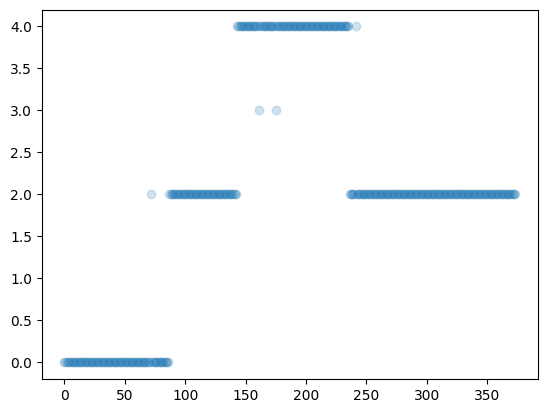

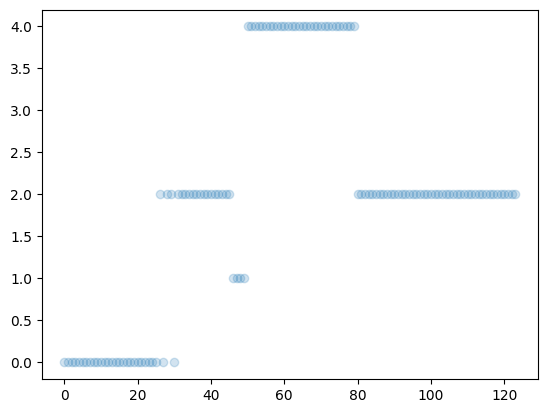

In [285]:
import matplotlib.pyplot as plt
plt.scatter(np.arange(0,len(y_inference_pred)), y_inference_pred, alpha=0.2)

#### Stap 5. Data postprocessing

#### Stap 6. Feedback logica

In [286]:
poses = {0:'downdog',
         1:'goddess',
         2:'plank',
         3:'tree',
         4:'warrior2',
         5:'overig'}

Pose found: downdog with probability: 0.77


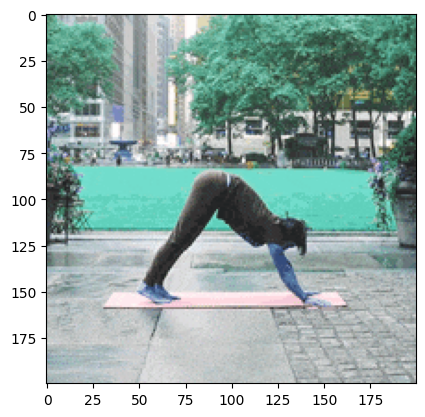

Pose found: plank with probability: 0.6


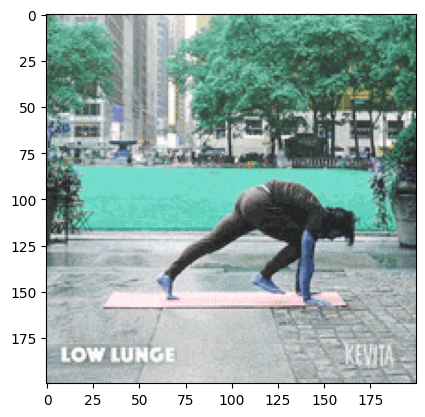

Pose found: warrior2 with probability: 0.45


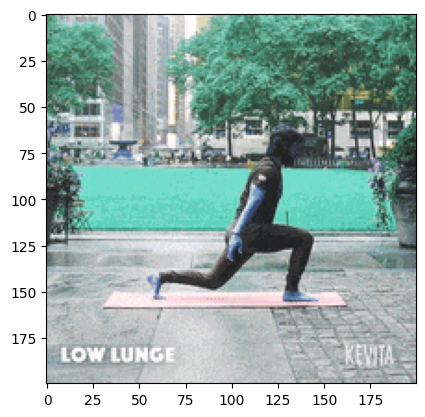

Pose found: plank with probability: 0.56


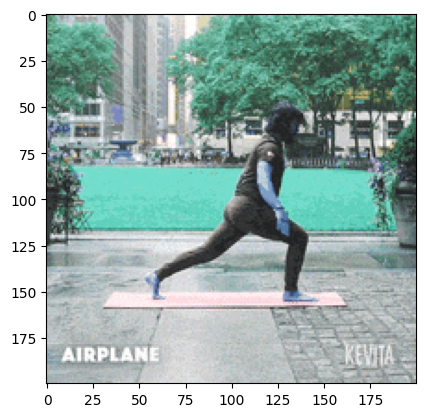

Pose found: downdog with probability: 0.76


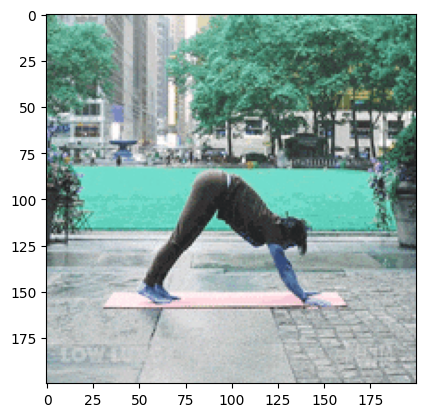

Pose found: plank with probability: 0.51


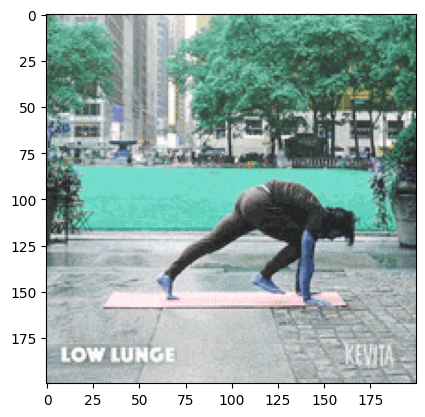

Pose found: goddess with probability: 0.47


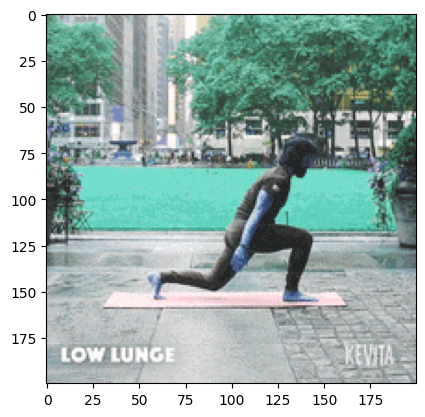

Pose found: warrior2 with probability: 0.92


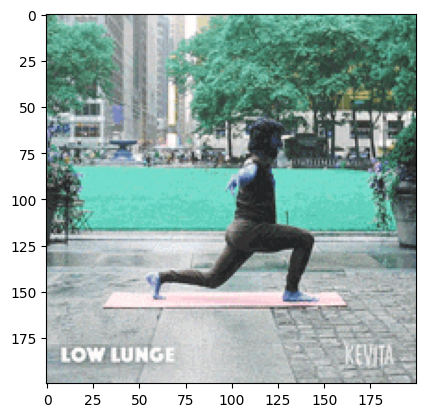

Pose found: plank with probability: 0.63


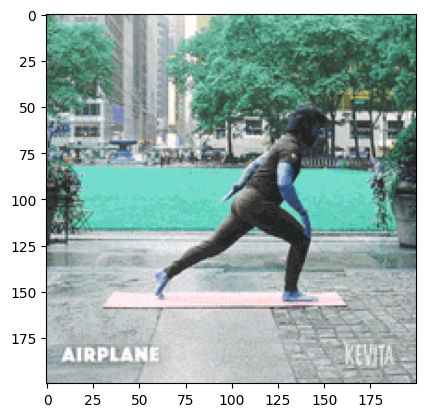

In [287]:
i = 0
previous_pose = 5
while i < len(y_inference_pred) - 5:
    if stats.mode(y_inference_pred[i:i+5])[1] > 3:
        if stats.mode(y_inference_pred[i:i+5])[0] != previous_pose:
            previous_pose = int(stats.mode(y_inference_pred[i:i+5])[0])
            proba = np.round(y_inference_pred_proba[i:i+5,previous_pose].mean(),2)
            print("Pose found: " + poses[previous_pose] +
                  " with probability: " + str(proba))
            image = Image.fromarray(results_inference[int(analytics_df['frame_number'].loc[i])].orig_img).convert('RGB')
            plt.imshow(image)
            plt.show()

        i = i + 5
    else: i = i + 1